In [56]:
#Análisis del dataser iris
#Configuración inicial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("Setup Complete")


Setup Complete


In [57]:
#Conectar drive
from google.colab import drive
drive.mount('/content/drive')

#Leer csv
iris = pd.read_csv('/content/drive/MyDrive/Datasets/Iris/Iris.csv')
print ("Dataset cargado")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado


In [58]:
print (iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [59]:
#Borrar columna ID

iris.drop(columns='Id', inplace=True)
print (iris.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [60]:
# Cambiar encabezados a español
iris.columns = ['Largo Sépalo', 'Ancho Sépalo', 'Largo Pétalo', 'Ancho Pétalo', 'Especie']
print (iris.head())

   Largo Sépalo  Ancho Sépalo  Largo Pétalo  Ancho Pétalo      Especie
0           5.1           3.5           1.4           0.2  Iris-setosa
1           4.9           3.0           1.4           0.2  Iris-setosa
2           4.7           3.2           1.3           0.2  Iris-setosa
3           4.6           3.1           1.5           0.2  Iris-setosa
4           5.0           3.6           1.4           0.2  Iris-setosa


In [61]:
#Describe (Estadísticas descriptivas)
iris.describe ()

,Largo Sépalo,Ancho Sépalo,Largo Pétalo,Ancho Pétalo
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
#Informaación
iris.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Largo Sépalo  150 non-null    float64
 1   Ancho Sépalo  150 non-null    float64
 2   Largo Pétalo  150 non-null    float64
 3   Ancho Pétalo  150 non-null    float64
 4   Especie       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
#conteo por especie
iris['Especie'].value_counts()

,count
Especie,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [64]:
#Verificación de datos nulos y duplicados
print ("Datos nulos: ", iris.isnull().sum())
print ("Datos duplicados: ", iris.duplicated().sum())

Datos nulos:  Largo Sépalo    0
Ancho Sépalo    0
Largo Pétalo    0
Ancho Pétalo    0
Especie         0
dtype: int64
Datos duplicados:  3


In [65]:
#Agrupor por especie y calculo de promedios
iris.groupby('Especie').mean(numeric_only=True)

,Largo Sépalo,Ancho Sépalo,Largo Pétalo,Ancho Pétalo
Especie,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [66]:
#Caluclo de la matriz de correlación
correlaciones = iris.corr(numeric_only=True)
print (correlaciones)

              Largo Sépalo  Ancho Sépalo  Largo Pétalo  Ancho Pétalo
Largo Sépalo      1.000000     -0.109369      0.871754      0.817954
Ancho Sépalo     -0.109369      1.000000     -0.420516     -0.356544
Largo Pétalo      0.871754     -0.420516      1.000000      0.962757
Ancho Pétalo      0.817954     -0.356544      0.962757      1.000000


<ipython-input-70-3716a90506fe>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


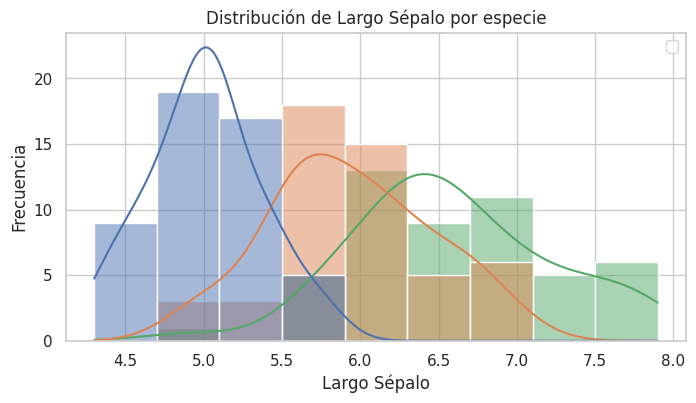

<ipython-input-70-3716a90506fe>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


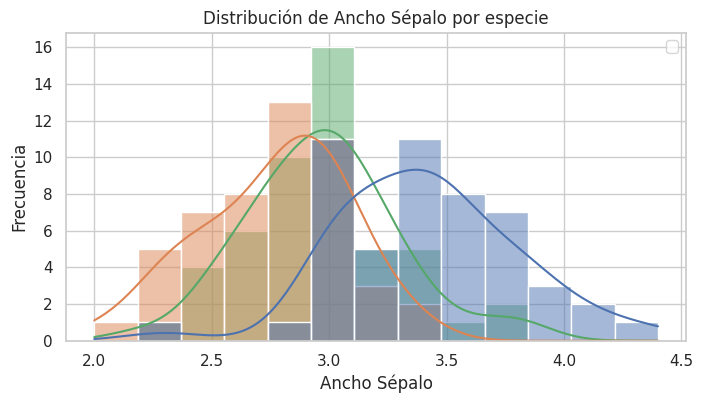

<ipython-input-70-3716a90506fe>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


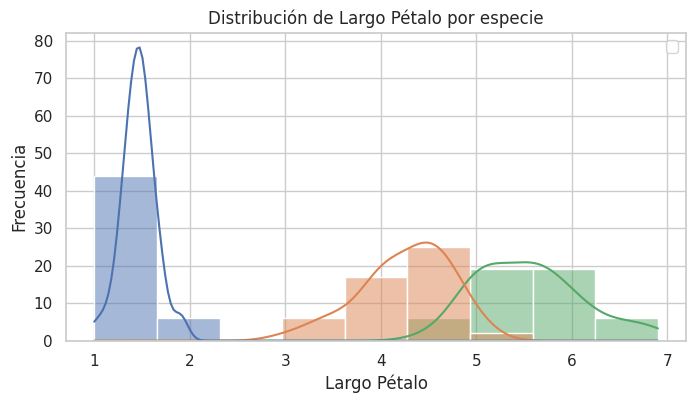

<ipython-input-70-3716a90506fe>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


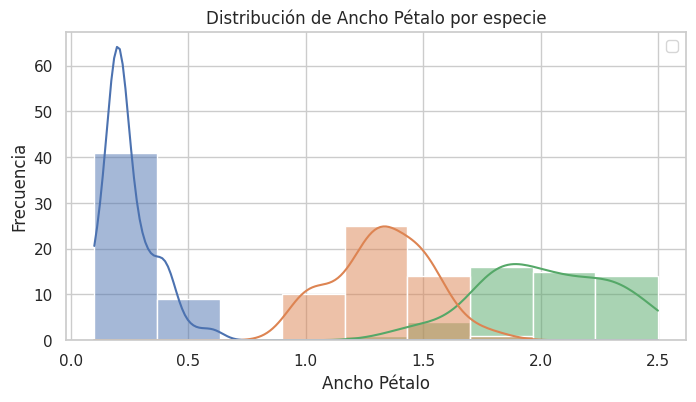

In [70]:
#visualizacición  histograma
for columna in iris.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=iris, x=columna, hue="Especie", kde=True)
    plt.title(f'Distribución de {columna} por especie')
    plt.ylabel('Frecuencia')
    plt.xlabel(columna)
    plt.legend()
    plt.show()

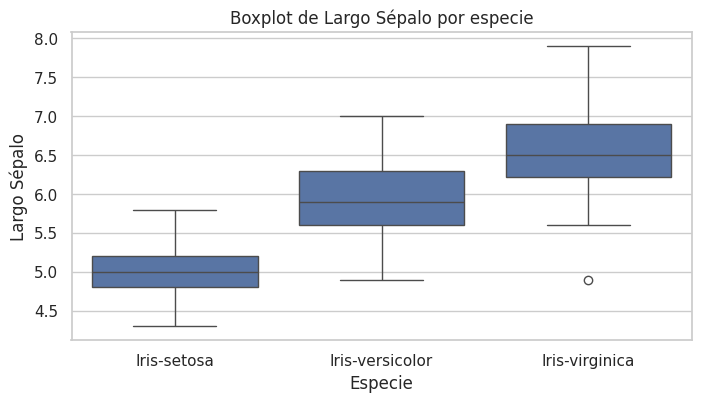

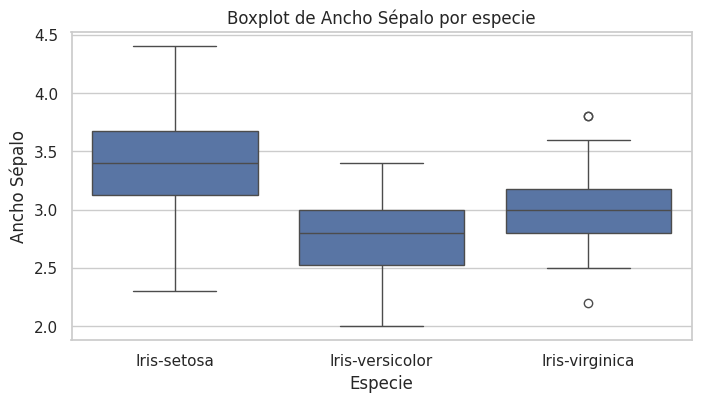

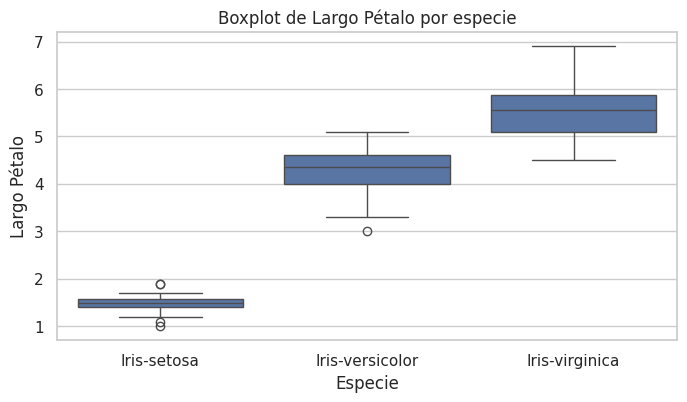

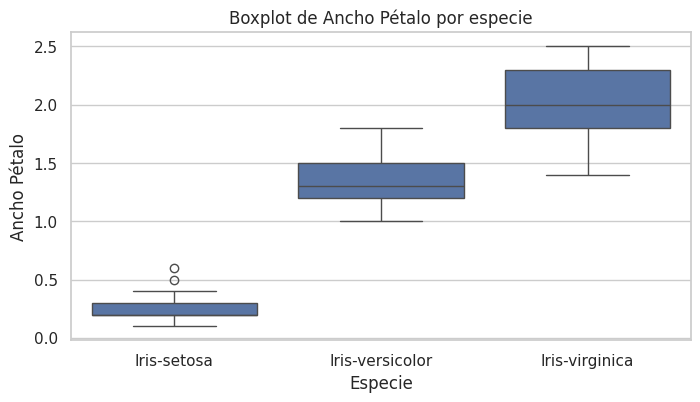

In [71]:
#Cajas y bigotes
for columna in iris.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=iris, x="Especie", y=columna)
    plt.title(f'Boxplot de {columna} por especie')
    plt

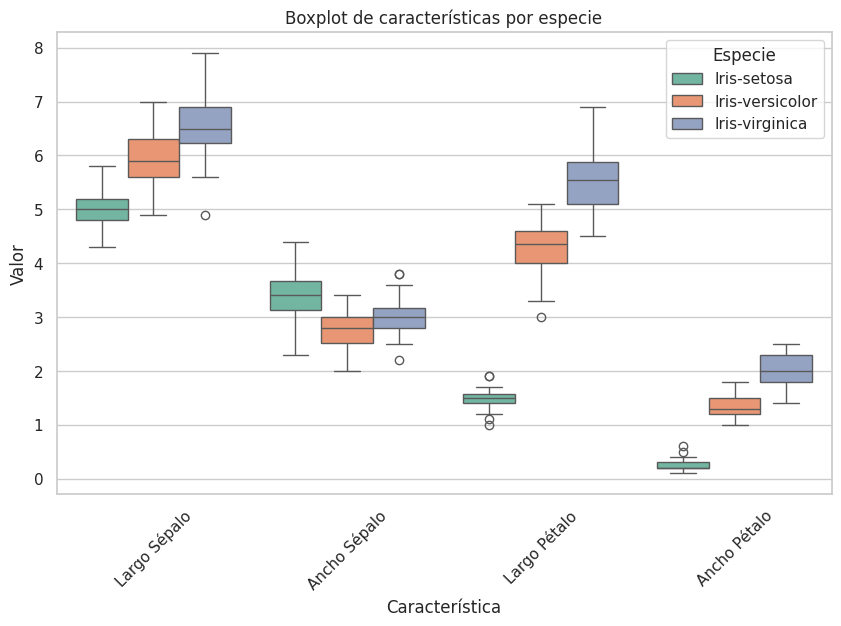

In [76]:
#Cajas y bigotes versión 2
plt.figure(figsize=(10, 6))
iris_melted = iris.melt(id_vars="Especie", var_name="Característica", value_name="Valor")
sns.boxplot(data=iris_melted, x="Característica", y="Valor", hue="Especie", palette="Set2")
plt.title('Boxplot de características por especie')
plt.xticks(rotation=45)
plt.legend(title='Especie')
plt.show()

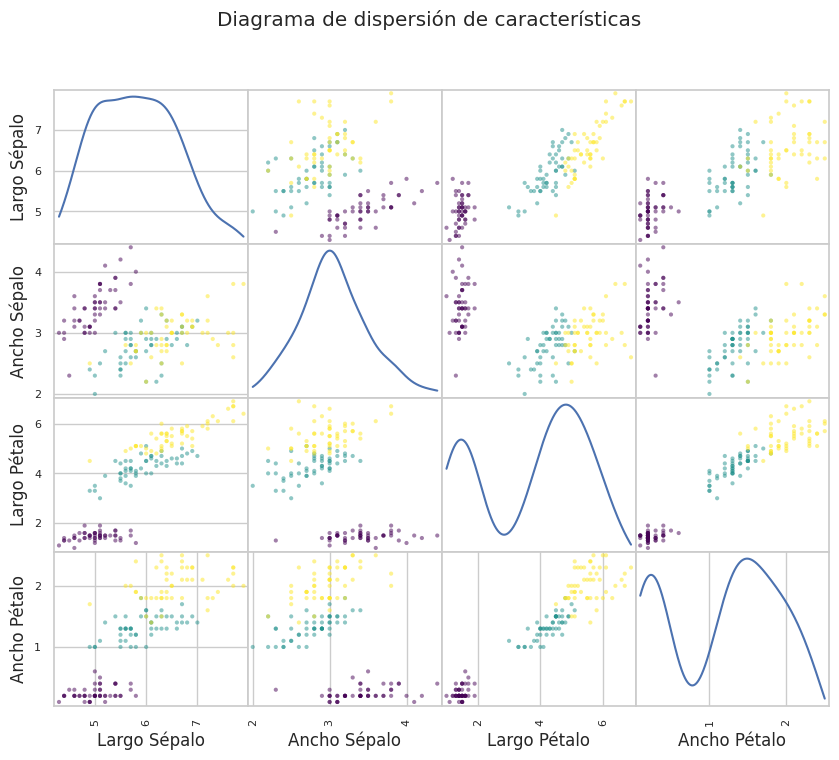

In [79]:
#Diagrama de dispersión
from pandas.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 8), diagonal='kde', c=iris["Especie"].astype('category').cat.codes, cmap='viridis')
plt.suptitle('Diagrama de dispersión de características')
plt.show()

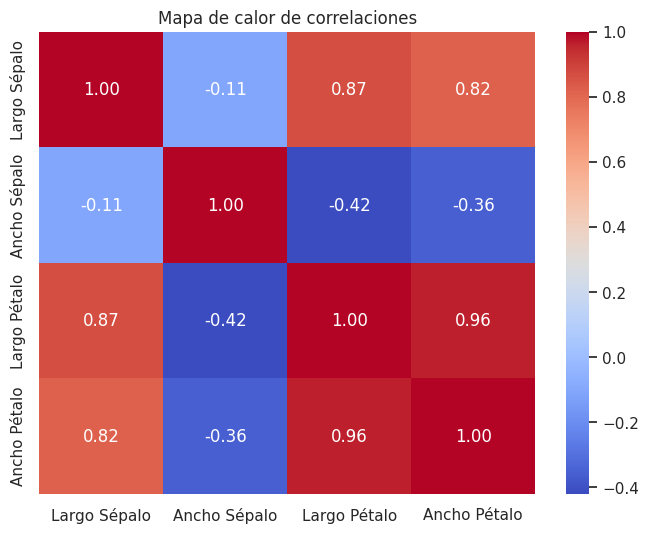

In [80]:
#Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()